In [257]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
# ----------- Tools -----------------
def get_peak_interval(data, skip, unit='day'):
    '''
    Params:
        data : pandas DataFrame
            Data containing infection peak data per
            population. Must contain a colum "Peak_time".
        skip : int
            Amount of populations to skip before the
            peak intervals are calculated.
        unit : str (optional)
            Either "day" (default) or "hour" to set the 
            respective time scale for the peak time 
            differences.
    Output:
        Returns the average and standard deviation of the
        peak time difference between adjacent populations. 
        The first n=skip populations are disregarded for 
        the calculation.
    '''
    # Locate only non-skipped populations
    df = data.iloc[skip+1:]
    
    # Define init and final peak times
    init_t = np.array(df.iloc[0:-1].Peak_time) 
    final_t = np.array(df.iloc[1:].Peak_time) 
    
    # Get time interval and return statistics
    delta_t = final_t - init_t
    if unit == 'day':
        delta_t = delta_t / 24
        return np.mean(delta_t), np.std(delta_t)
    elif unit == 'hour':
        return np.mean(delta_t), np.std(delta_t)
    else:
        print('Error: unit must be "day" or "hour".')

        
def plot_peak_intervals(mob_frac, data_mean, data_err, 
                        path=None):
    '''
    Params:
        mob_fraction : array
            Array containing the value of mobility
            fraction corresponding to the given results
            for peak time difference.
        data_mean, data_err : dict
            Dictionaries containing the mean and 
            standard deviation of the peak time 
            differences for the methods KT, RM and
            IB, and for different mobility fractions.
        path : str (optional)
            File in which to save the generated plot.
            The plot is not saved by default.
    Output:
        Plots the given data in a sinle figure as the
        peak time difference with respect to the
        mobility fraction.
    '''
    # Figure params
    FONTSIZE = 13
    CAPSIZE = 4
    COLORS = ['k','tab:red','tab:blue']

    # Init figure
    fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                          nrows=1, ncols=1)

    # Plot results
    diff = 0.02
    models = ['KT', 'RM', 'IB']
    for i, mname in enumerate(models):
        # Small x diff for clarity
        xdata = [(1+i*diff)*f for f in mob_frac]

        ydata = data_mean[mname]
        yerr = data_err[mname]
        plt.errorbar(xdata, ydata, yerr=yerr, 
                    capsize=CAPSIZE, c=COLORS[i], 
                     zorder=i, label=mname)

    # Set log scale for x-axis
    ax.set_xscale('log')

    # Set labels and tick params
    plt.xlabel(r'$\sigma$', fontsize=FONTSIZE)
    plt.ylabel(r'$\Delta t_{Peak}$ (day)', fontsize=FONTSIZE)
    plt.tick_params(labelsize=FONTSIZE-2)

    # Legend
    plt.legend(fontsize=FONTSIZE-2)

    plt.tight_layout()
    if path != None:
        plt.savefig(path, dpi=200)
    plt.show();
    
    
    
# Function to get infection peak heights from trajectories
def get_peak_height(data, m):
    '''
    Params:
        data : pandas DataFrame
            Data containing the overall trajectory of a
            system, with columns "Infected_k" where 
            k = 1,...,m
        m : int
            Number of infectious stages in the dynamics.
    Output:
        Returns the peak height considering all the 
        infectious stages of the system.
    '''
    # Get total amount of infected individuals
    infected = data[['Infected_'+str(k+1) for k in range(m)]]
    tot_inf = np.sum(infected, axis=1)
    
    # Get max value and return
    return np.max(tot_inf)


# Function to get infection peak times from trajectories
def get_peak_time(data, m):
    '''
    Params:
        data : pandas DataFrame
            Data containing the overall trajectory of a
            system, with columns "Infected_k" where 
            k = 1,...,m
        m : int
            Number of infectious stages in the dynamics.
    Output:
        Returns the peak time considering all the 
        infectious stages of the system.
    '''
    # Get total amount of infected individuals
    infected = data[['Infected_'+str(k+1) for k in range(m)]]
    tot_inf = np.sum(infected, axis=1)
    
    # Get index of max value and return corresponding time
    t_max = data['t'].iloc[np.argmax(tot_inf)]
    return t_max

# Linear mobility network - First run

## Data preparation

In [26]:
# File and system params
M_pct_vals = [0.001, 0.005, 0.01, 0.05, 0.1]
M_pct_labels = ['0_001', '0_005', '0_01', '0_05', '0_1']
models = ['KT', 'RM', 'IB']

# Import the data
folder_path = './data/linear_network_mobility_fractions/'

all_data_ln = dict() # Infection peak data
all_traj_ln = dict() # Overall trajectories

for mname in models:
    all_data_ln[mname] = dict()
    all_traj_ln[mname] = dict()
    
    for i, f in enumerate(M_pct_vals):
        label = M_pct_labels[i]
        
        # Load infection peak data
        fname = mname + '_model/' + mname +\
                '_data_M_f_' + label + '.csv'
        all_data_ln[mname][f] = pd.read_csv(folder_path + fname)
        
        # Load trajectories
        fname_traj = fname.replace('data', 'traj')
        all_traj_ln[mname][f] = pd.read_csv(folder_path + fname_traj)

## Peak time interval as a function of mobility fraction

In [62]:
# Initial populations to skip
skip = 10

# Get peak time interval statistics
delta_res_mean = dict()
delta_res_err = dict()
for mname in models:
    delta_res_mean[mname] = [
        get_peak_interval(all_data_ln[mname][f], skip=skip)[0]\
        for f in M_pct_vals
    ]
    delta_res_err[mname] = [
        get_peak_interval(all_data_ln[mname][f], skip=skip)[1]\
        for f in M_pct_vals
    ]

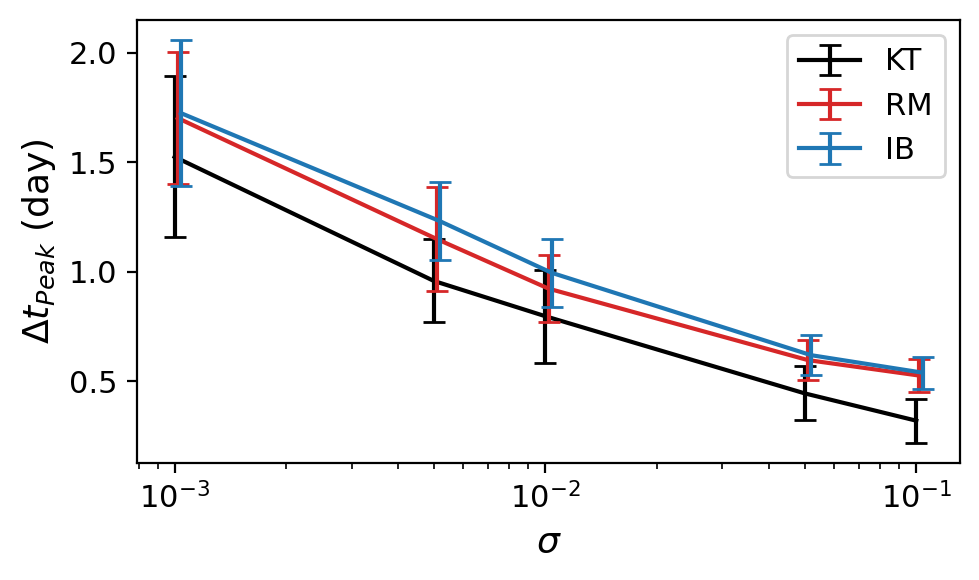

In [66]:
plot_peak_intervals(M_pct_vals, delta_res_mean, delta_res_err)

# Linear mobility network - Second run

## Data preparation

In [67]:
# File and system params
M_pct_vals = [0.001, 0.005, 0.01, 0.05, 0.1]
M_pct_labels = ['0_001', '0_005', '0_01', '0_05', '0_1']
models = ['KT', 'RM', 'IB']

# Import the data
folder_path = './data/linear_network_mobility_fractions_2/'

all_data_ln = dict() # Infection peak data
all_traj_ln = dict() # Overall trajectories

for mname in models:
    all_data_ln[mname] = dict()
    all_traj_ln[mname] = dict()
    
    for i, f in enumerate(M_pct_vals):
        label = M_pct_labels[i]
        
        # Load infection peak data
        fname = mname + '_model/' + mname +\
                '_data_M_f_' + label + '.csv'
        all_data_ln[mname][f] = pd.read_csv(folder_path + fname)
        
        # Load trajectories
        fname_traj = fname.replace('data', 'traj')
        all_traj_ln[mname][f] = pd.read_csv(folder_path + fname_traj)

## Peak time interval as a function of mobility fraction

In [76]:
# Initial populations to skip
skip = 20

# Get peak time interval statistics
delta_res_mean = dict()
delta_res_err = dict()
for mname in models:
    delta_res_mean[mname] = [
        get_peak_interval(all_data_ln[mname][f], skip=skip)[0]\
        for f in M_pct_vals
    ]
    delta_res_err[mname] = [
        get_peak_interval(all_data_ln[mname][f], skip=skip)[1]\
        for f in M_pct_vals
    ]

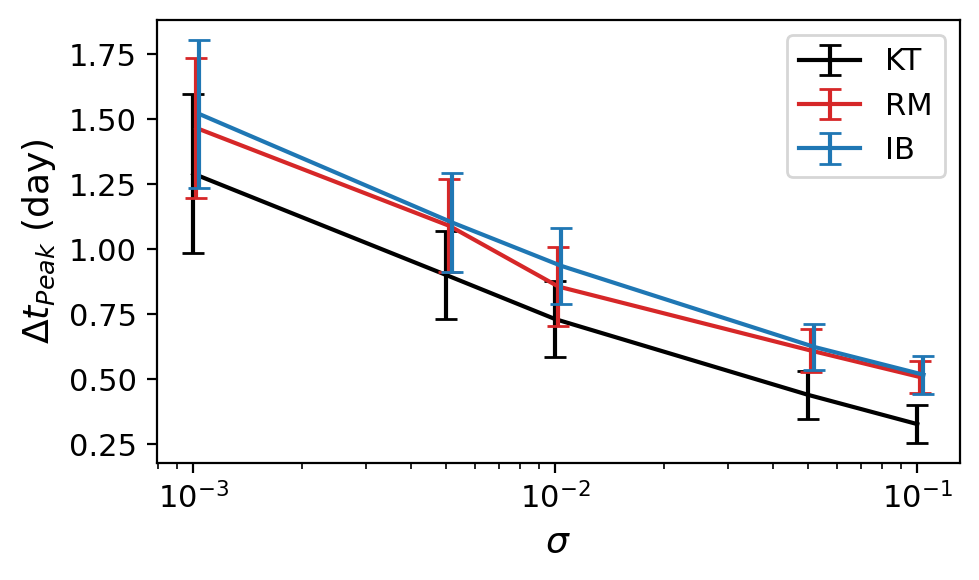

In [77]:
plot_peak_intervals(M_pct_vals, delta_res_mean, delta_res_err)

# Linear mobility network - Third run

## Data preparation

In [417]:
# File and system params
M_pct_vals = [0.001, 0.005, 0.01, 0.05, 0.1]
M_pct_labels = ['0_001', '0_005', '0_01', '0_05', '0_1']
models = ['KT', 'RM', 'IB']

# Import the data
folder_path = './data/linear_network_mobility_fractions_3/'

all_data_ln = dict() # Infection peak data
all_traj_ln = dict() # Overall trajectories

for mname in models:
    all_data_ln[mname] = dict()
    all_traj_ln[mname] = dict()
    
    for i, f in enumerate(M_pct_vals):
        label = M_pct_labels[i]
        
        # Load infection peak data
        fname = mname + '_model/' + mname +\
                '_data_M_f_' + label + '.csv'
        all_data_ln[mname][f] = pd.read_csv(folder_path + fname)
        
        # Load trajectories
        fname_traj = fname.replace('data', 'traj')
        all_traj_ln[mname][f] = pd.read_csv(folder_path + fname_traj)

## Peak time interval as a function of mobility fraction

In [418]:
# Initial populations to skip
skip = 10

# Get peak time interval statistics
delta_res_mean = dict()
delta_res_err = dict()
for mname in models:
    delta_res_mean[mname] = [
        get_peak_interval(all_data_ln[mname][f], skip=skip)[0]\
        for f in M_pct_vals
    ]
    delta_res_err[mname] = [
        get_peak_interval(all_data_ln[mname][f], skip=skip)[1]\
        for f in M_pct_vals
    ]

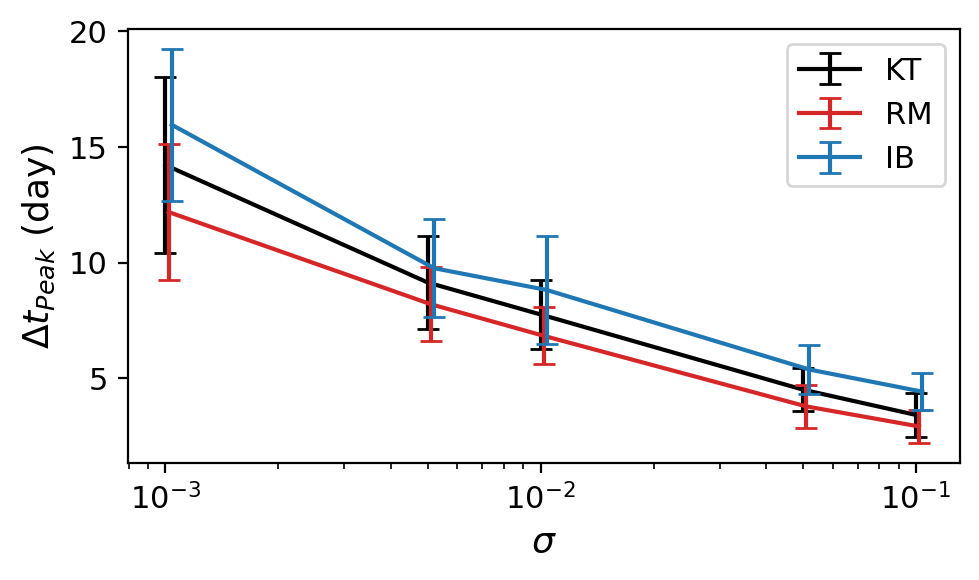

In [420]:
plot_peak_intervals(M_pct_vals, delta_res_mean, delta_res_err, 
                    path='./figures/dt_peak_vs_sigma_linear_net.png')

# Linear mobility network - Effect of recovery rate

## Data preparation

In [421]:
# File and system params
gamma_vals_days = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0]
gamma_vals = [i/24 for i in gamma_vals_days]
gamma_labels = [str(i).replace('.','_') for i in gamma_vals_days]
models = ['KT', 'RM', 'IB']

# Import the data
folder_path = './data/linear_network_infectious_period/'
folder_path_2 = './data/linear_network_infectious_period_2/'

all_data_ln = dict() # Infection peak data
all_traj_ln = dict() # Overall trajectories

all_data_ln_2 = dict()
all_traj_ln_2 = dict()

for mname in models:
    all_data_ln[mname] = dict()
    all_traj_ln[mname] = dict()
    
    all_data_ln_2[mname] = dict()
    all_traj_ln_2[mname] = dict()
    
    for i, gamma in enumerate(gamma_vals):
        label = gamma_labels[i]
        
        # Load infection peak data
        fname = mname + '_model/' + mname +\
                '_data_gamma_' + label + '.csv'
        all_data_ln[mname][gamma] = pd.read_csv(folder_path + fname)
        all_data_ln_2[mname][gamma] = pd.read_csv(folder_path_2 + fname)
        
        # Load trajectories
        fname_traj = fname.replace('data', 'traj')
        all_traj_ln[mname][gamma] = pd.read_csv(folder_path + fname_traj)
        all_traj_ln_2[mname][gamma] = pd.read_csv(folder_path_2 + fname_traj)

## Peak velocity with respect to infectious period 

In [422]:
# Initial populations to skip
skip = 20

# Get peak velocity statistics
vel_res_mean = dict()
vel_res_err = dict()

vel_res_mean_2 = dict()
vel_res_err_2 = dict()

for mname in models:
    vel_res_mean[mname] = [
        1/get_peak_interval(all_data_ln[mname][gamma], skip=skip)[0]\
        for gamma in gamma_vals
    ]
    vel_res_err[mname] = [
        1/get_peak_interval(all_data_ln[mname][gamma], skip=skip)[1]\
        for gamma in gamma_vals
    ]
    
    vel_res_mean_2[mname] = [
        1/get_peak_interval(all_data_ln_2[mname][gamma], skip=skip)[0]\
        for gamma in gamma_vals
    ]
    vel_res_err_2[mname] = [
        1/get_peak_interval(all_data_ln_2[mname][gamma], skip=skip)[1]\
        for gamma in gamma_vals
    ]
    
    
    
# Get peak time interval statistics
delta_res_mean = dict()
delta_res_err = dict()

delta_res_mean_2 = dict()
delta_res_err_2 = dict()

for mname in models:
    delta_res_mean[mname] = [
        get_peak_interval(all_data_ln[mname][gamma], skip=skip)[0]\
        for gamma in gamma_vals
    ]
    delta_res_err[mname] = [
        get_peak_interval(all_data_ln[mname][gamma], skip=skip)[1]\
        for gamma in gamma_vals
    ]

    
    delta_res_mean_2[mname] = [
        get_peak_interval(all_data_ln_2[mname][gamma], skip=skip)[0]\
        for gamma in gamma_vals
    ]
    delta_res_err_2[mname] = [
        get_peak_interval(all_data_ln_2[mname][gamma], skip=skip)[1]\
        for gamma in gamma_vals
    ]

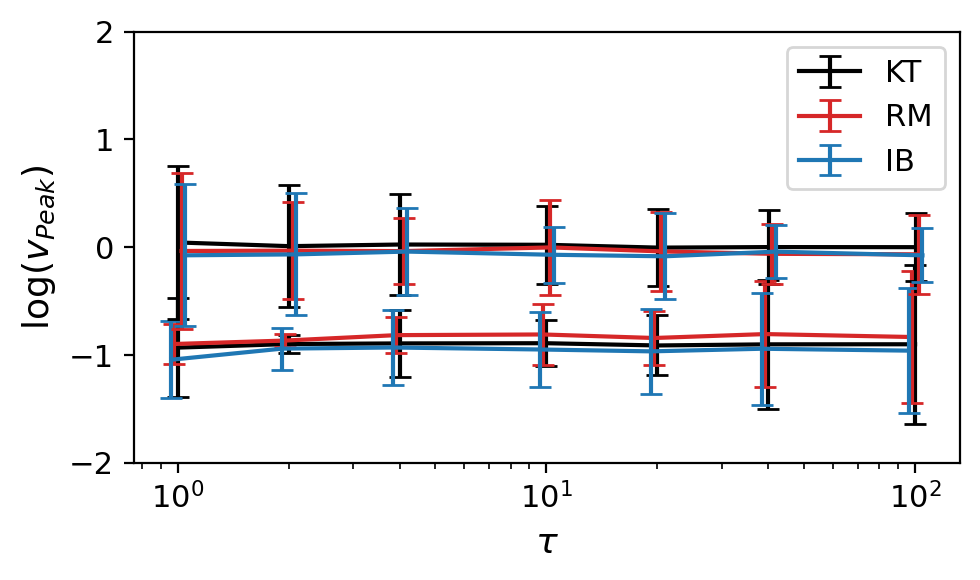

In [423]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                      nrows=1, ncols=1)

# Plot results
diff = 0.02
models = ['KT', 'RM', 'IB']
for i, mname in enumerate(models):
    # Small x diff for clarity
    xdata = [(1+i*diff)*gamma for gamma in gamma_vals_days]
    xdata = np.array([1/x for x in xdata])

    ydata = np.log10(vel_res_mean[mname])
    yerr = np.log10(vel_res_err[mname])
    plt.errorbar(xdata, ydata, yerr=yerr, 
                capsize=CAPSIZE, c=COLORS[i], 
                 zorder=i, label=mname)
    
    xdata_2 = [(1-i*diff-0.005)*gamma for gamma in gamma_vals_days]
    xdata_2 = np.array([1/x for x in xdata_2])
    
    ydata_2 = np.log10(vel_res_mean_2[mname])
    yerr_2 = np.log10(vel_res_err_2[mname])
    plt.errorbar(xdata_2, ydata_2, yerr=yerr_2,
                capsize=CAPSIZE, c=COLORS[i],
                zorder=i+10)

# Set log scale for axes
ax.set_xscale('log')
#ax.set_yscale('log')

# Set labels and tick params
plt.xlabel(r'$\tau$', fontsize=FONTSIZE)
plt.ylabel(r'$\log(v_{Peak})$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)

# Limits
plt.ylim(top=2, bottom=-2)

# Legend
plt.legend(fontsize=FONTSIZE-2)

plt.tight_layout()
plt.show();

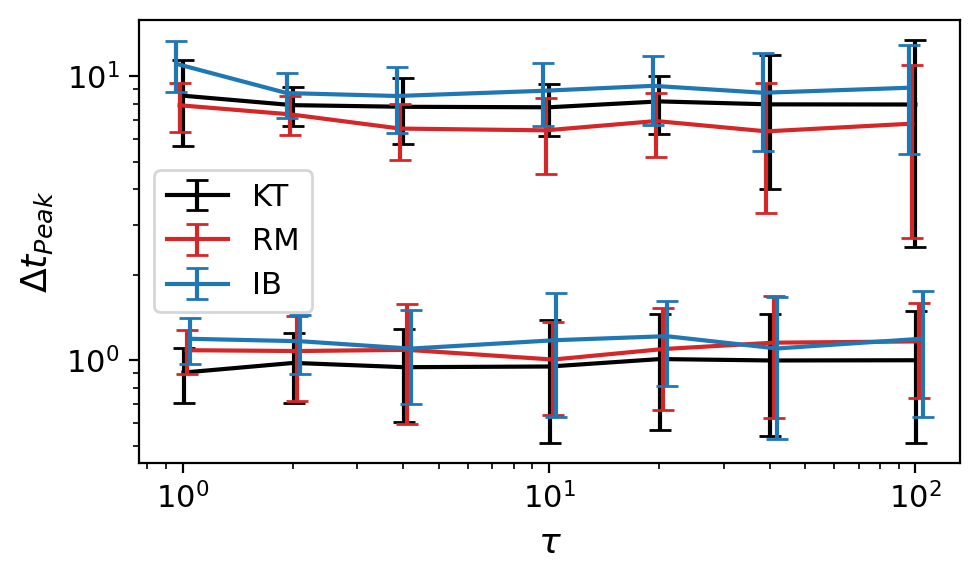

In [431]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                      nrows=1, ncols=1)

# Plot results
diff = 0.02
models = ['KT', 'RM', 'IB']
for i, mname in enumerate(models):
    # Small x diff for clarity
    xdata = [(1+i*diff)*gamma for gamma in gamma_vals_days]
    xdata = np.array([1/x for x in xdata])

    ydata = delta_res_mean[mname]
    yerr = delta_res_err[mname]
    plt.errorbar(xdata, ydata, yerr=yerr, 
                capsize=CAPSIZE, c=COLORS[i], 
                 zorder=i, label=mname)
    
    xdata_2 = [(1-i*diff-0.005)*gamma for gamma in gamma_vals_days]
    xdata_2 = np.array([1/x for x in xdata_2])
    
    ydata_2 = delta_res_mean_2[mname]
    yerr_2 = delta_res_err_2[mname]
    plt.errorbar(xdata_2, ydata_2, yerr=yerr_2,
                capsize=CAPSIZE, c=COLORS[i],
                zorder=i+10)

# Set log scale for axes
ax.set_xscale('log')
ax.set_yscale('log')

# Set labels and tick params
plt.xlabel(r'$\tau$', fontsize=FONTSIZE)
plt.ylabel(r'$\Delta t_{Peak}$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)

# Limits
#plt.ylim(top=2, bottom=-2)

# Legend
plt.legend(fontsize=FONTSIZE-2)

plt.tight_layout()
plt.show();

In [428]:
# Get peak heights
res_heights = dict()
for mname in models:
    res_heights[mname] = [
        get_peak_height(all_traj_ln[mname][gamma], m=5)\
        for gamma in gamma_vals
    ]
    
res_heights_2 = dict()
for mname in models:
    res_heights_2[mname] = [
        get_peak_height(all_traj_ln_2[mname][gamma], m=5)\
        for gamma in gamma_vals
    ]

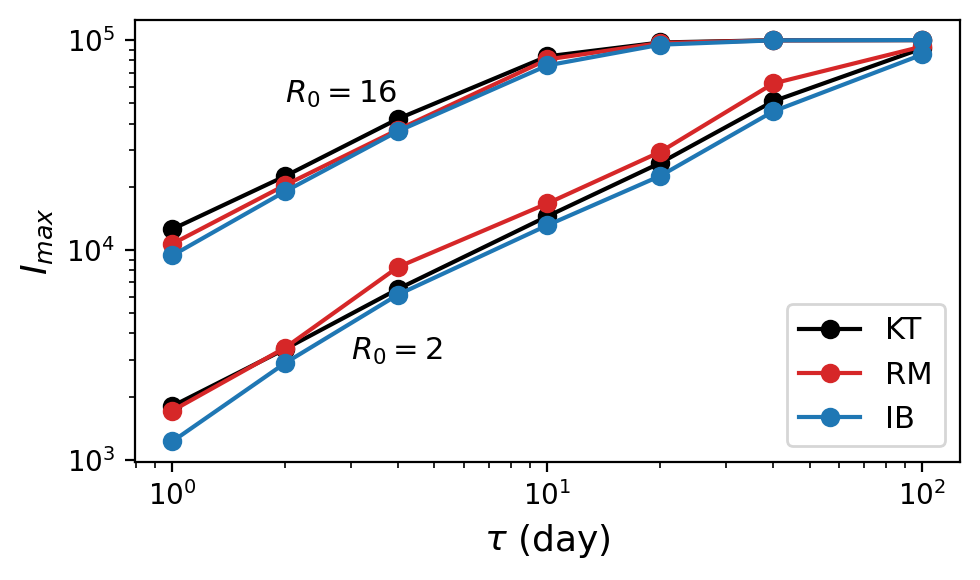

In [461]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                      nrows=1, ncols=1)

# Plot results
for i, mname in enumerate(models):
    tau_days = 1/np.array(gamma_vals_days)
    plt.plot(tau_days, res_heights[mname], 
             c=COLORS[i], label=mname, marker='o')
    plt.plot(tau_days, res_heights_2[mname], 
            c=COLORS[i], marker='o')
    
# Text
plt.text(2, 5e4, r'$R_0=16$', fontsize=FONTSIZE-2)
plt.text(3, 3e3, r'$R_0=2$', fontsize=FONTSIZE-2)
    
# Labels
plt.xlabel(r'$\tau$ (day)', fontsize=FONTSIZE)
plt.ylabel(r'$I_{max}$', fontsize=FONTSIZE)
    
# Axis scales
plt.yscale('log')
plt.xscale('log')

# Legend
plt.legend(fontsize=FONTSIZE-2)

plt.tight_layout()
plt.savefig('./figures/I_max_vs_tau_linear_net.png', dpi=200)
plt.show();

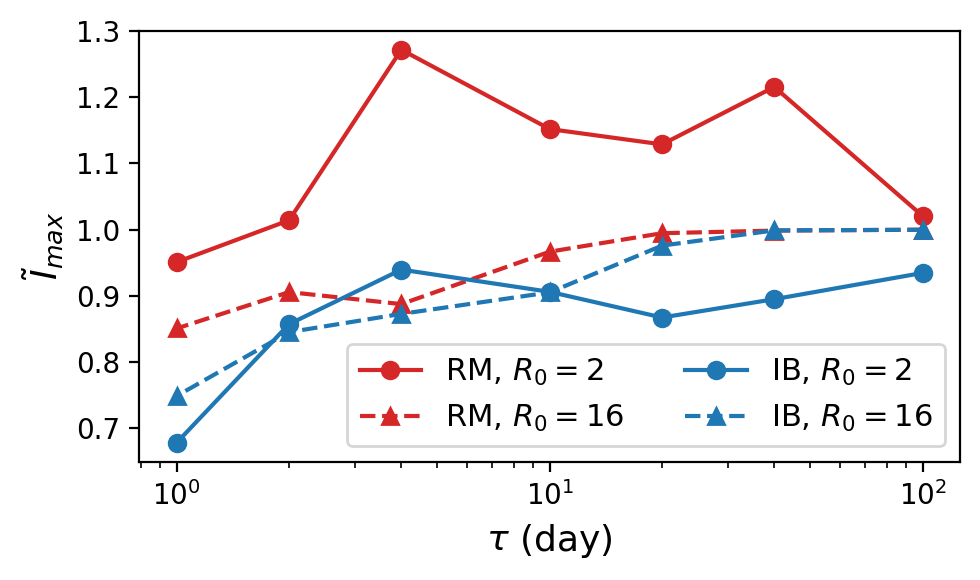

In [463]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                      nrows=1, ncols=1)

# Plot results
for i, mname in enumerate(['RM', 'IB']):
    tau_days = 1/np.array(gamma_vals_days)
    plt.plot(tau_days, np.array(res_heights[mname]) / np.array(res_heights['KT']), 
             c=COLORS[i], label=mname + str(r', $R_0=2$'), marker='o')
    plt.plot(tau_days, np.array(res_heights_2[mname]) / np.array(res_heights_2['KT']), 
            c=COLORS[i], label=mname + str(r', $R_0=16$'), marker='^', ls='--')
    
# Labels
plt.xlabel(r'$\tau$ (day)', fontsize=FONTSIZE)
plt.ylabel(r'$\tilde{I}_{max}$', fontsize=FONTSIZE)

# Scale
plt.xscale('log')
    
# Legend
plt.legend(fontsize=FONTSIZE-2, ncol=2)

# Limits
plt.ylim(bottom=0.65, top=1.3)

plt.tight_layout()
plt.savefig('./figures/I_tilde_max_vs_tau_linear_net.png', dpi=200)
plt.show();

# Linear mobility network - Bulk simulations

In [464]:
# File and system params
models = ['KT', 'RM', 'IB']

# Import the data
folder_path = './data/linear_network_bulk/'

all_data_ln = dict() # Infection peak data

for mname in models:
    all_data_ln[mname] = dict()
    
    for i in range(10):    
        # Load infection peak data
        fname = mname + '_model/' + mname +\
                '_data_' + str(i+1) + '.csv'
        all_data_ln[mname][i] = pd.read_csv(folder_path + fname)

In [465]:
# Initial populations to skip
skip = 20

# Get peak time interval observations
delta_obs = dict()
for mname in models:
    delta_obs[mname] = []
    for i in range(10):
        # Locate only non-skipped populations
        df = all_data_ln[mname][i].iloc[skip+1:]

        # Define init and final peak times
        init_t = np.array(df.iloc[0:-1].Peak_time) 
        final_t = np.array(df.iloc[1:].Peak_time) 

        # Get time interval and save observations
        delta_t = list((final_t - init_t)/24)
        delta_obs[mname].extend(delta_t)

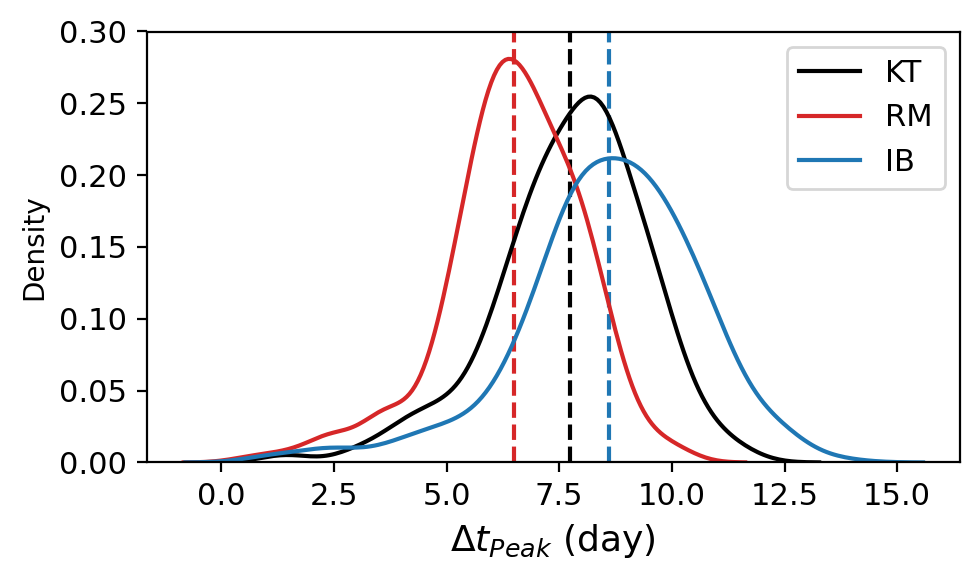

In [489]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                      nrows=1, ncols=1)

for i, mname in enumerate(models):
    sns.kdeplot(delta_obs[mname], label=mname, 
               color=COLORS[i])
    plt.vlines(np.mean(delta_obs[mname]), ymin=0, 
              ymax=1, colors=COLORS[i], 
               linestyles='--')
    
# Labels
plt.xlabel(r'$\Delta t_{Peak}$ (day)', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
    
# Legend
plt.legend(fontsize=FONTSIZE-2)

# Limits
plt.ylim(bottom=0, top=0.3)

plt.tight_layout()
plt.savefig('./figures/dt_peak_bulk_linear_net.png', dpi=200)
plt.show();

In [484]:
# Initial populations to skip
skip = 0

# Get peak height observations
height_obs = dict()
for mname in models:
    height_obs[mname] = []
    for i in range(10):
        # Locate only non-skipped populations
        df = all_data_ln[mname][i].iloc[skip+1:]

        # Get peak heights
        height_obs[mname].extend(list(df.Peak_height/2e3))

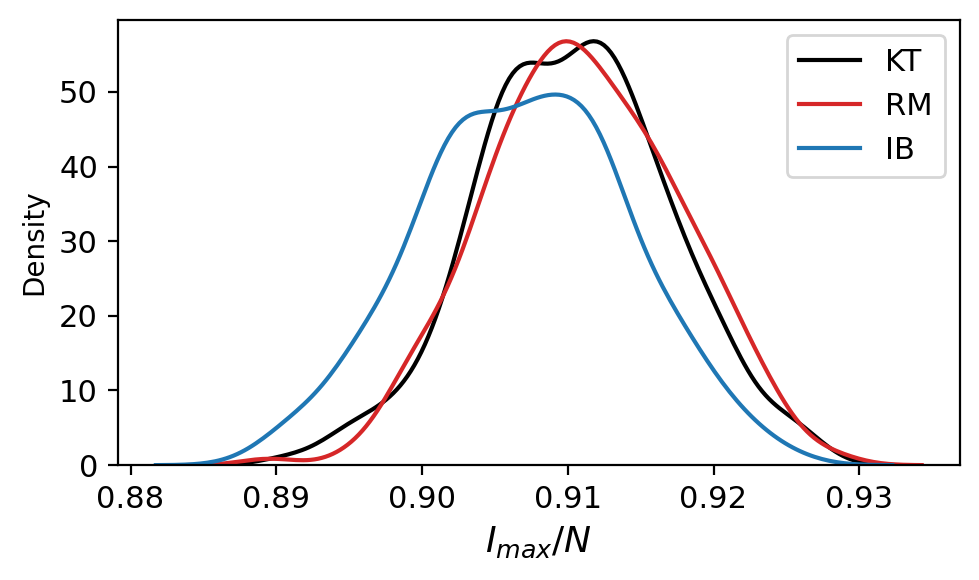

In [493]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200,
                      nrows=1, ncols=1)

for i, mname in enumerate(models):
    sns.kdeplot(height_obs[mname], label=mname, 
               color=COLORS[i])
    
# Labels
plt.xlabel(r'$I_{max} / N$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)

# Legend
plt.legend(fontsize=FONTSIZE-2)

plt.tight_layout()
plt.savefig('./figures/I_max_bulk_linear_net.png', dpi=200)
plt.show();

# Power law networks - Analysis

In [351]:
# File and system params
models = ['KT', 'RM', 'IB']
# Degree exponents
k_exp_values = [2.0, 2.2, 2.4, 2.6, 2.8, 3.0]
# Average half-degree
m_k = 3
# Total number of populations 
N_pop = 100
# Number of simulations
N_sims = 3
# Number of infection stages
m = 5

# Import the data
folder_path = './data/power_law_network/'

all_data_pl = dict() # Infection peak data
all_traj_pl = dict() # Infection trajectory data

for mname in models:
    all_data_pl[mname] = dict()
    all_traj_pl[mname] = dict()
    
    for k_exp in k_exp_values:
        k_exp_data = []
        k_exp_traj = []
        for i in range(N_sims): 
            # Load infection peak data
            k_label = str(k_exp).replace('.','_')
            fname = mname + '_model/' + mname +\
                    '_data_k_exp_' + k_label + '_' + str(i+1) + '.csv'
            k_exp_data.append(pd.read_csv(folder_path + fname))
            
            # Load trajectory
            traj_path = fname.replace('data','traj')
            k_exp_traj.append(pd.read_csv(folder_path + traj_path))

        all_data_pl[mname][k_exp] = k_exp_data
        all_traj_pl[mname][k_exp] = k_exp_traj
        

In [352]:
# Get infected peak height and time
peak_heights_pl = dict()
peak_times_pl = dict()
final_att_pl = dict()
for mname in models:
    peak_heights_pl[mname] = dict()
    peak_times_pl[mname] = dict()
    final_att_pl[mname] = dict()
    for k_exp in k_exp_values:
        peak_vals = []
        time_vals = []
        final_att_vals = []
        for i in range(N_sims):
            # Get total population
            N_k_exp = np.sum(
                all_traj_pl[mname][k_exp][i][['Susceptible','Infected_1']],
                axis=1).iloc[0]
            # Get normalized peak height
            peak_vals.append(
                get_peak_height(all_traj_pl[mname][k_exp][i], m) / N_k_exp
            )
            # Get peak time in days
            time_vals.append(
                get_peak_time(all_traj_pl[mname][k_exp][i], m) / 24
            )
            # Get final attack rate
            final_att_vals.append(
                1 - all_traj_pl[mname][k_exp][i]['Susceptible'].iloc[-1] / N_k_exp
            )
        
        # Save results
        peak_heights_pl[mname][k_exp] = peak_vals
        peak_times_pl[mname][k_exp] = time_vals
        final_att_pl[mname][k_exp] = final_att_vals
        

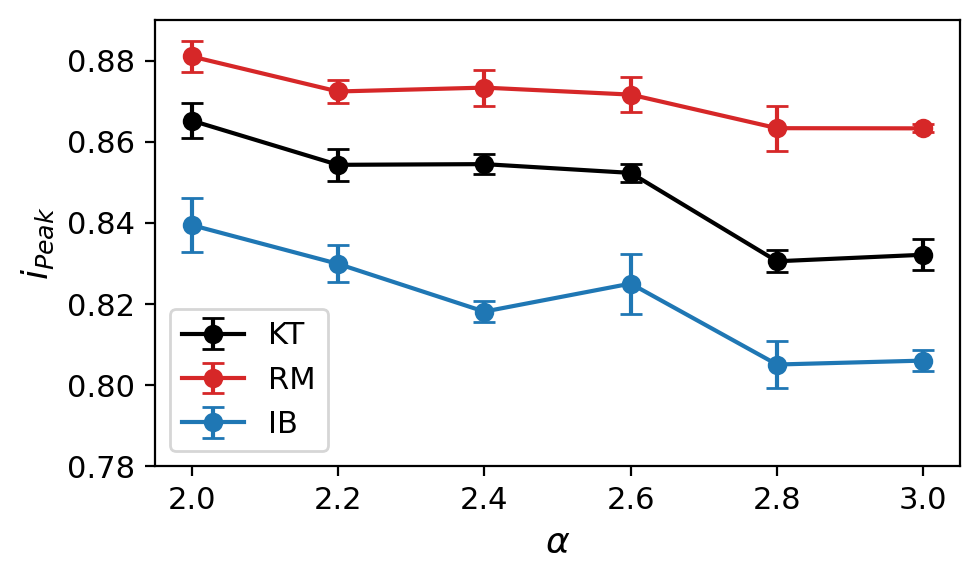

In [353]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200, nrows=1, ncols=1)

# Plot normalized peak height versus exponent
for i, mname in enumerate(models):
    peak_vals = []
    peak_err = []
    for k_exp in k_exp_values:
        peak_vals.append(np.mean(peak_heights_pl[mname][k_exp]))
        peak_err.append(np.std(peak_heights_pl[mname][k_exp]))

    ax.errorbar(k_exp_values, peak_vals, yerr=peak_err, 
                c=COLORS[i], capsize=CAPSIZE, marker='o',
                label=mname)
    
# Labels
plt.xlabel(r'$\alpha$', fontsize=FONTSIZE)
plt.ylabel(r'$i_{Peak}$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
    
# Legend
plt.legend(fontsize=FONTSIZE-2)

# Limits
plt.ylim(bottom=0.78, top=0.89)
    
plt.tight_layout()
plt.show();

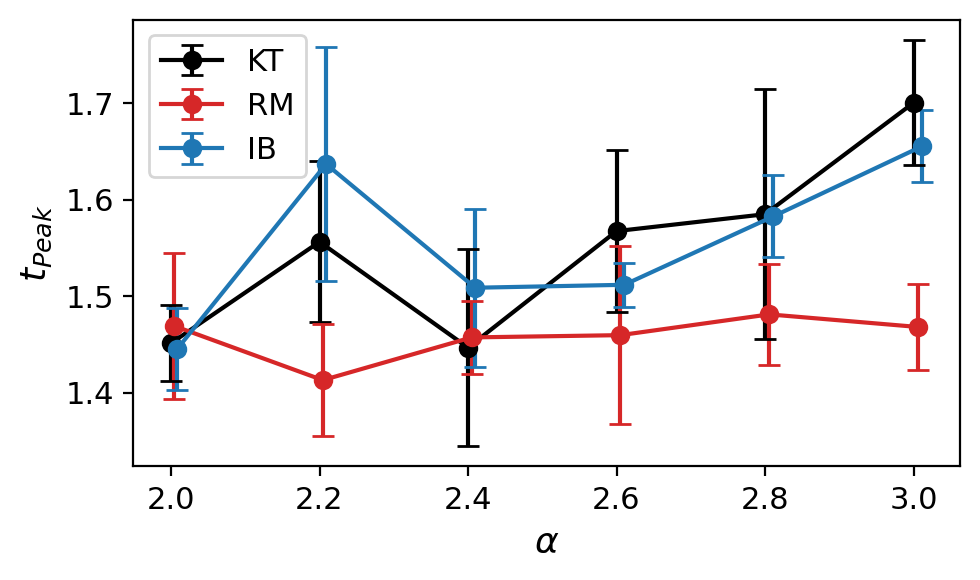

In [354]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200, nrows=1, ncols=1)

# Plot peak time versus exponent
diff = 0.002
for i, mname in enumerate(models):
    time_vals = []
    time_err = []
    for k_exp in k_exp_values:
        time_vals.append(np.mean(peak_times_pl[mname][k_exp]))
        time_err.append(np.std(peak_times_pl[mname][k_exp]))
        
    xvals = [(1+diff*i)*k for k in k_exp_values]
    ax.errorbar(xvals, time_vals, yerr=time_err, 
                c=COLORS[i], capsize=CAPSIZE, marker='o',
                label=mname)
    
# Labels
plt.xlabel(r'$\alpha$', fontsize=FONTSIZE)
plt.ylabel(r'$t_{Peak}$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
    
# Legend
plt.legend(fontsize=FONTSIZE-2)

# Limits
#plt.ylim(bottom=0.78, top=0.88)
    
plt.tight_layout()
plt.show();

We can look at some specific values and plot the distributions.

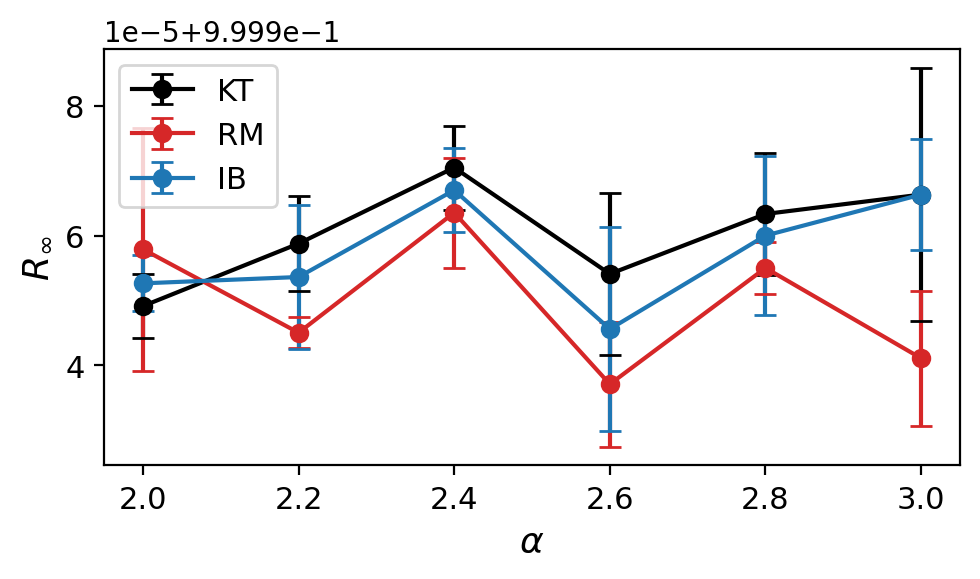

In [350]:
# Figure params
FONTSIZE = 13
CAPSIZE = 4
COLORS = ['k','tab:red','tab:blue']

# Init figure
fig, ax = plt.subplots(figsize=(5,3), dpi=200, nrows=1, ncols=1)

# Plot final attack rate versus exponent
for i, mname in enumerate(models):
    final_att = []
    final_err = []
    for k_exp in k_exp_values:
        final_att.append(np.mean(final_att_pl[mname][k_exp]))
        final_err.append(np.std(final_att_pl[mname][k_exp]))
        

    ax.errorbar(k_exp_values, final_att, yerr=final_err, 
                c=COLORS[i], capsize=CAPSIZE, marker='o',
                label=mname)
    
# Labels
plt.xlabel(r'$\alpha$', fontsize=FONTSIZE)
plt.ylabel(r'$R_\infty$', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
    
# Legend
plt.legend(fontsize=FONTSIZE-2)

# Limits
#plt.ylim(bottom=0.78, top=0.88)
    
plt.tight_layout()
plt.show();

In [355]:
# Read population scale-free networks
folder_path = './data/power_law_network/networks/'

# Degree exponents
k_exp_values = [2.0, 2.2, 2.4, 2.6, 2.8, 3.0]

all_M_sf = []
for i, k_exp in enumerate(k_exp_values):
    file_path = 'power_law_k_exp_'+str(k_exp).replace('.', '_')+'.csv'
    all_M_sf.append(np.loadtxt(folder_path + file_path))

Let us plot the degree distributions:

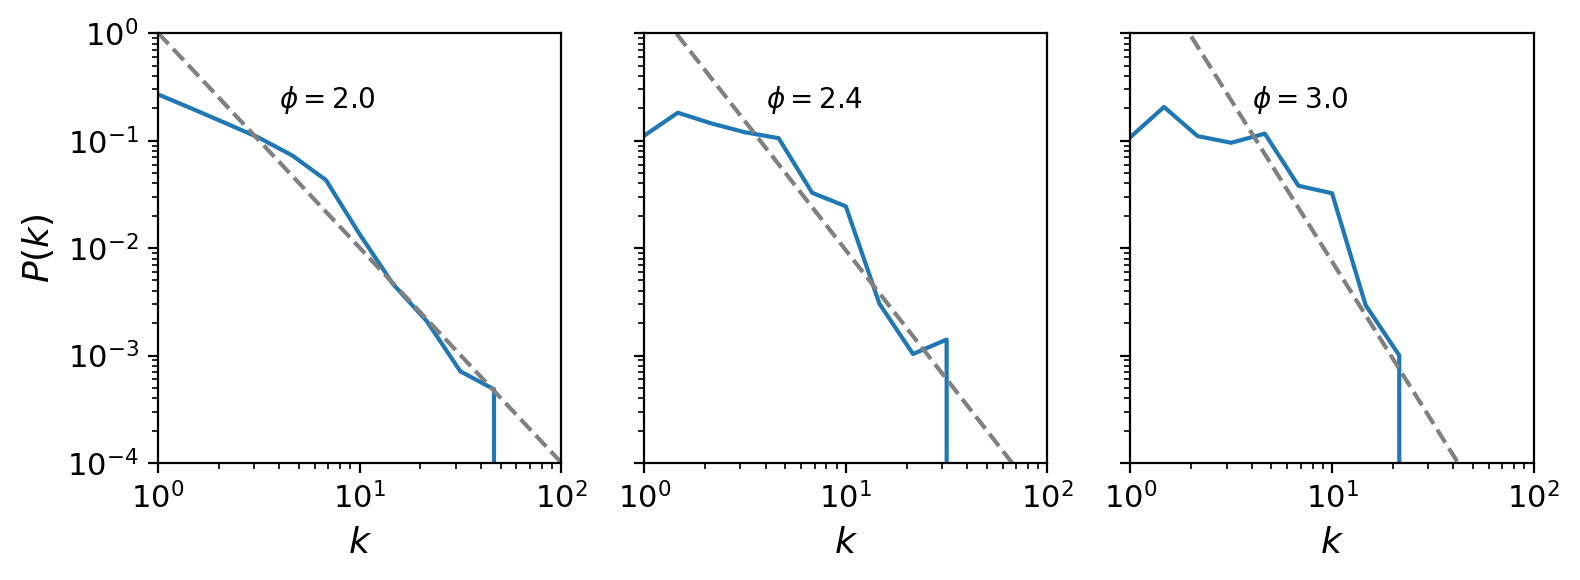

In [416]:
# Figure params
FONTSIZE = 13

# Init figure
fig, ax = plt.subplots(figsize=(8,3), dpi=200, 
                       nrows=1, ncols=3, sharey=True)

# Number of logarithmic bins
N_bins = 13

# Bias values for log-log slope
alpha_bias = [1.01, 2.4, 7.5] 

for i,k_exp in enumerate([2.0, 2.4, 3.0]):
    M = all_M_sf[k_exp_values.index(k_exp)]
    
    # Get degree observations
    deg = np.sum(M, axis=0)
    
    # Get degree values and bins
    vals, bins = np.histogram(deg, density=True,
                    bins=np.logspace(start=0, stop=2, num=N_bins))
    
    # Plot results
    ax[i].plot(bins[:-1], vals)
    
    # Plot expected slope
    xdom = np.linspace(1,1e2)
    ax[i].plot(xdom, alpha_bias[i]*np.power(xdom, -k_exp),
               ls='--', c='grey')
    
    # Add text
    ax[i].text(4, 0.2, r'$\phi=%s$' % k_exp)
    
    # Scale
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    
    # X limits
    ax[i].set_xlim(left=1, right=1e2)
    
    # Labels
    ax[i].set_xlabel(r'$k$', fontsize=FONTSIZE)
    ax[i].tick_params(labelsize=FONTSIZE-2)
    
# Y Label
ax[0].set_ylabel(r'$P(k)$', fontsize=FONTSIZE)
    
# Y limits
ax[0].set_ylim(bottom=1e-4, top=1)

plt.tight_layout()
plt.savefig('./figures/scale_free_deg_dist_comp.png', dpi=200)
plt.show();